In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
base_path = os.path.dirname(os.getcwd())
affinities_file = f'{base_path}/affinities/affinities_table.csv'
affinities = pd.read_csv(affinities_file)

In [17]:
affinities.index= affinities['Receptors']
affinities.drop(index=(['5-HT1C', '5-HT2C','alpha1D','alpha1','alpha2','alpha2B', '5-HT6', 'D5', 'M3', 'M4']), axis=1)

# from Kaar et al., https://doi.org/10.1016/j.neuropharm.2019.107704
# 4 = very high affinity (Ki < 1), 3 = high affinity (Ki 1–10),
# 2 = moderate affinity (Ki 10–100), 1 = low affinity (Ki 100–1000) and 0 = very low affinity (Ki > 1000)

edges = np.array([1, 10, 100, 1000])   

cols = affinities.loc[:, 'Olanzapine':'Flupentixol'].columns 
affinities[cols] = affinities[cols].apply(
    lambda s: (np.digitize(s.to_numpy(), edges, right=False) -4) *-1
)

In [26]:
affinities

,Receptors,Olanzapine,Clozapine,Norclozapine,Risperidone,Amisulpride,Flupentixol
Receptors,,,,,,,
5-HT1A,5-HT1A,0,1,2,1,0,0
5-HT1B,5-HT1B,1,1,1,2,0,0
5-HT1C,5-HT1C,2,0,0,0,0,0
5-HT2A,5-HT2A,3,3,2,4,0,2
5-HT2B,5-HT2B,2,3,3,2,2,0
5-HT2C,5-HT2C,0,2,0,2,0,0
5-HT6,5-HT6,0,2,2,0,0,0
D1,D1,2,1,2,1,0,3
D2,D2,2,1,1,3,3,4


In [88]:
def radar_plot(df, dname):
    N=26
    ax = plt.subplot(1,1,1, polar=True)
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    
    plt.xticks(angles, df['Receptors'], color='black', size=8)
    ax.tick_params(axis='x', rotation=15, pad=12)
    
    ax.set_rlabel_position(0)
    ax.set_ylim(0, 4)
    ax.set_yticks(np.arange(1, 5))                         # tick locations
    ax.set_rlabel_position(180)          # 180° = “south”  (0°=east, 0°=north,…)

    labels = ax.set_yticklabels(['low', 'moderate', 'high', 'very high'],
                       size=0, color='black')

    affinity = df[dname].to_numpy()
    ax.plot(angles, affinity, color = 'red', linewidth=1, linestyle='solid');
    ax.fill(angles, affinity, color = 'red', alpha = 0.5)

    plt.title(dname, size=26)
    plt.savefig(f'{base_path}/figs/{dname}_affinity_radarplot.jpg', dpi=300, transparent=True, bbox_inches='tight' )
    plt.show()
    plt.close('all')

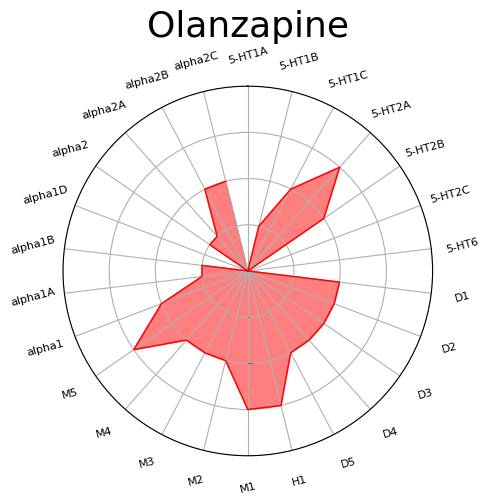

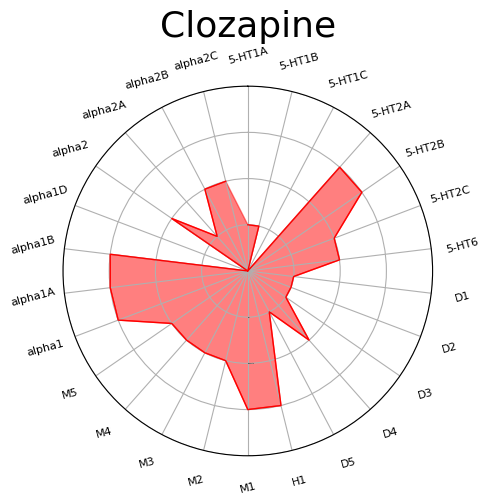

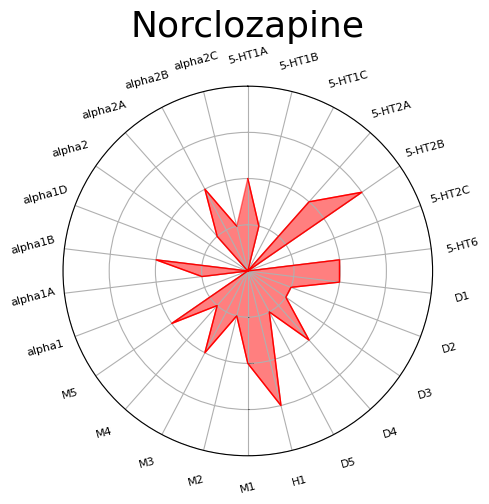

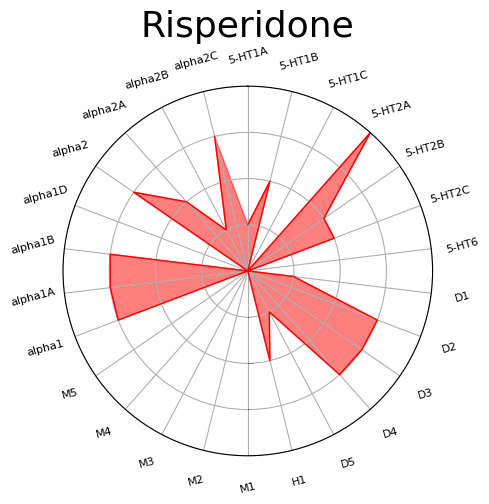

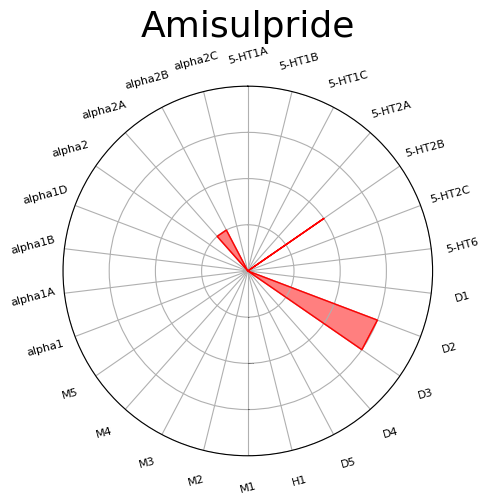

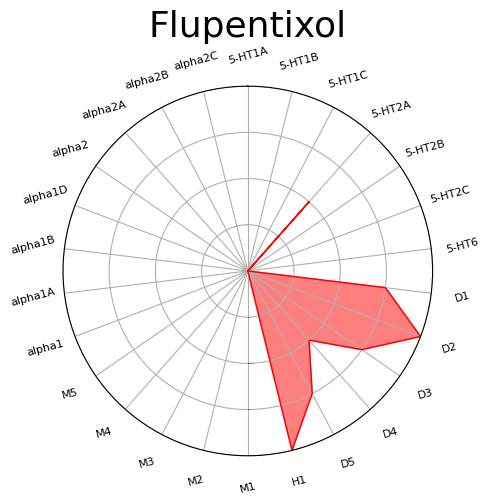

In [89]:
antipsychotics = ['Olanzapine', 'Clozapine', 'Norclozapine', 'Risperidone', 'Amisulpride', 'Flupentixol']
for antipsychotic in antipsychotics: 
    radar_plot(affinities, antipsychotic)
    

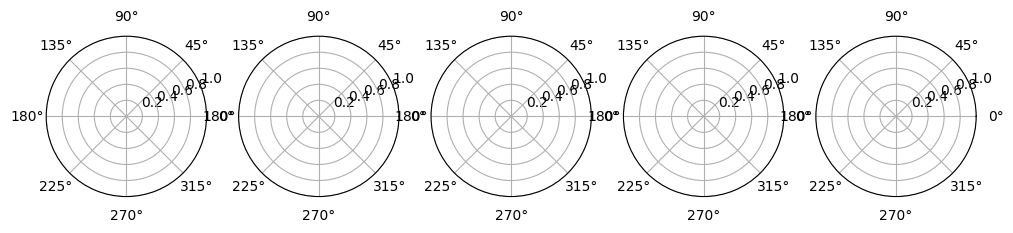

In [150]:
def radar_subplot(df, dname, ax):
    N=df.shape[0]
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    
    ax.set_xticks(angles, df['Receptors'], color='black', size=10)
    ax.tick_params(axis='x', rotation=-25, pad=12)
    
    ax.set_rlabel_position(0)
    ax.set_ylim(0, 4)
    ax.set_yticks(np.arange(1, 5))                         # tick locations
    ax.set_rlabel_position(180)          # 180° = “south”  (0°=east, 0°=north,…)

    labels = ax.set_yticklabels(['low', 'moderate', 'high', 'very high'],
                                size=0, color='black')

    affinity = df[dname].to_numpy()
    ax.plot(angles, affinity, color = 'red', linewidth=1, linestyle='solid');
    ax.fill(angles, affinity, color = 'red', alpha = 0.5)
    ax.set_title(dname, size=24)
    

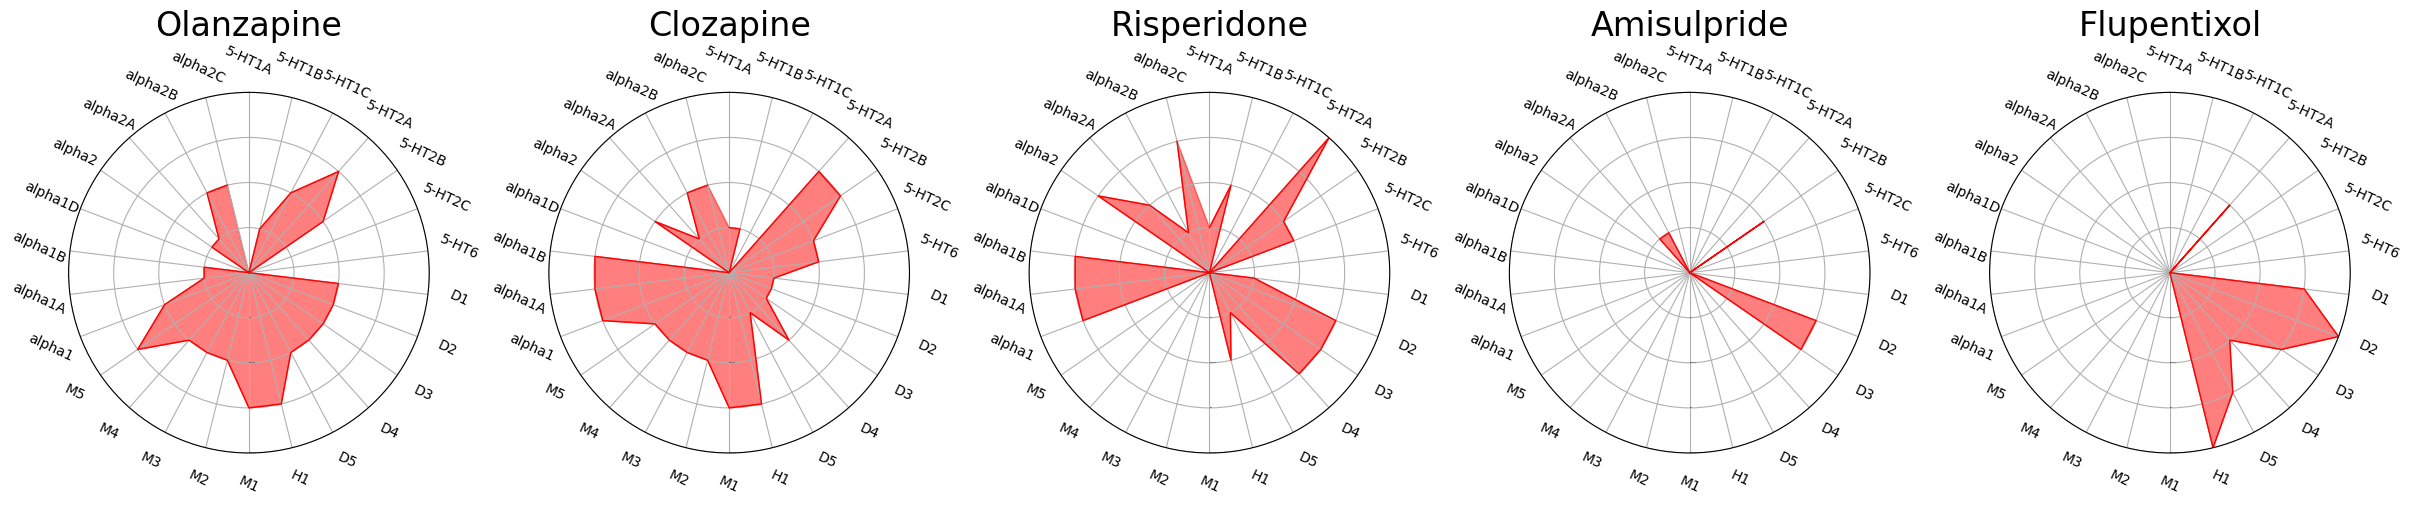

In [151]:
fig, axs = plt.subplots(1, 5, subplot_kw={'projection': 'polar'}, figsize=(24,6), 
                        constrained_layout=True)
antipsychotics = ['Olanzapine', 'Clozapine', 'Risperidone', 'Amisulpride', 'Flupentixol']

for i, antipsychotic in enumerate(antipsychotics): 
    radar_subplot(affinities, antipsychotic, axs[i]) 

fig.savefig(f'{base_path}/figs/all_radarplots.jpg', dpi=300, transparent=True, bbox_inches='tight' )